In [1]:
import h5py
import numpy as np
import os
from datetime import datetime
from collections import defaultdict
import pandas as pd

folder_path = "/srv/data/MOSDAC/INSAT3DR/AOD/ALL"

def extract_aod(file_path):
    filename_parts = os.path.basename(file_path).split('_')
    date_str = filename_parts[1]  # This extracts "01APR2023"
    date = np.datetime64(datetime.strptime(date_str, '%d%b%Y').date(), 'D')  

    with h5py.File(file_path, 'r') as file:
        aod = file['AOD'][:]
        aod[aod == -999] = np.nan  # Replace -999 with NaN
        lat = file['latitude'][:]
        lon = file['longitude'][:]

        lat_grid, lon_grid = np.meshgrid(lat, lon, indexing='ij')
        lat_flat = lat_grid.flatten()
        lon_flat = lon_grid.flatten()
        aod_flat = aod.flatten()
        
        # ICIMOD COORDINATES
        #POKHARA
        #mask = ((lat_flat >= 28.097900) & (lat_flat <= 28.277100) & (lon_flat >= 83.066908) & (lon_flat <= 83.884092))
        #ISSYKUL
        #mask = ((lat_flat >= 42.532900) & (lat_flat <= 42.713100) & (lon_flat >= 76.882495) & (lon_flat <= 77.083505))
        #KANPUYR
        mask = ((lat_flat >=26.422900 ) & (lat_flat <=26.603100) & (lon_flat >=80.130933) & (lon_flat <=80.333087))
        #BHOLA
        #mask = ((lat_flat >=22.13900 ) & (lat_flat <=22.317100) & (lon_flat >=90.660285) & (lon_flat <=90.851715))
         # pune
        #mask = ((lat_flat >=18.446900 ) & (lat_flat <=18.627100) & (lon_flat >=73.71462) & (lon_flat <=73.898538))
        #LAHORER
        #mask = ((lat_flat >=31.38990 ) & (lat_flat <=31.570100) & (lon_flat >=74.169947) & (lon_flat <=74.358053))
        #karunya
        #mask = ((lat_flat >=10.844900) & (lat_flat <=11.025100 ) & (lon_flat >=76.649366) & (lon_flat <=76.838634))
        #gandhi college
        #mask = ((lat_flat >=25.780900 ) & (lat_flat <=25.961100 ) & (lon_flat >=84.033428) & (lon_flat <=84.222572))
        #IIT DELHI
        #mask = ((lat_flat >=28.454900 ) & (lat_flat <=28.635100 ) & (lon_flat >=77.098271) & (lon_flat <=77.287729))


        
        filtered_aod = aod_flat[mask]
        
        return date, filtered_aod

aod_dict = defaultdict(list)

for filename in os.listdir(folder_path):
    if filename.endswith(".h5"):
        filename_parts = filename.split('_')
        version_str = filename_parts[-1]  # Extract version part like "V02R00.h5"
        if 'V02' in version_str:  # Process only version 2 files
            file_path = os.path.join(folder_path, filename)
            date, filtered_aod = extract_aod(file_path)
            aod_dict[date].extend(filtered_aod)

# Calculate the mean AOD for each day
aod_by_day = {date: np.nanmean(aod_list) for date, aod_list in aod_dict.items()}
std_by_day = {date: np.nanstd(aod_list) for date, aod_list in aod_dict.items()}

aod_df = pd.DataFrame(list(aod_by_day.items()), columns=['Date', 'Mean_AOD'])
aod_df1 = pd.DataFrame(list(std_by_day.items()), columns=['Date', 'std'])

print(aod_df)


          Date  Mean_AOD
0   2023-09-23  1.277820
1   2023-12-24  0.589565
2   2022-09-08       NaN
3   2024-03-27  0.509886
4   2022-12-17  0.357045
..         ...       ...
750 2023-06-04       NaN
751 2023-01-20  0.810915
752 2023-08-17       NaN
753 2024-04-01  0.821606
754 2024-02-22  1.350527

[755 rows x 2 columns]


/tmp/ipykernel_3425569/2846445596.py:64: RuntimeWarning: Mean of empty slice
  aod_by_day = {date: np.nanmean(aod_list) for date, aod_list in aod_dict.items()}
/home/jupyter-sanjid/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [2]:
# Print all AOD values for a specific date (e.g., 01APR2023)
specific_date = np.datetime64('2024-09-22', 'D')  # Change this to the date you're interested in

# Check if the date is in the dictionary and print the AOD values
if specific_date in aod_dict:
    print(f"AOD values for {specific_date}:")
    print(aod_dict[specific_date])  # This prints all the AOD values for that specific date
else:
    print(f"No AOD data found for {specific_date}")

AOD values for 2024-09-22:
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [3]:
#  Aeronet data
import pandas as pd
from tabulate import tabulate
#path = "aeronet/kanpur/2023 kanpur.xlsx"
#df = pd.read_excel(path)
#df['Date'] = pd.to_datetime(df['Date(dd:mm:yyyy)'], format='%m/%d/%Y')
#POKHARA
#file_path=("/srv/data/Shared/AERONET-AOD-ALL/AOD/AOD15/DAILY/19930101_20240803_Pokhara.lev15")
#kanpur
file_path=("/srv/data/Shared/AERONET-AOD-ALL/AOD/AOD15/DAILY/19930101_20240803_Kanpur.lev15")
#ISSYKUL
#file_path=("/srv/data/Shared/AERONET-AOD-ALL/AOD/AOD15/DAILY/19930101_20240803_Issyk-Kul.lev15")
#BHOLA
#file_path=("/srv/data/Shared/AERONET-AOD-ALL/AOD/AOD15/DAILY/19930101_20240803_Bhola.lev15")
#pune
#file_path=("/srv/data/Shared/AERONET-AOD-ALL/AOD/AOD15/DAILY/19930101_20240803_Pune.lev15")
#LAHORE
#file_path=("/srv/data/Shared/AERONET-AOD-ALL/AOD/AOD15/DAILY/19930101_20240803_Lahore.lev15")
#karunya
#file_path=("/srv/data/Shared/AERONET-AOD-ALL/AOD/AOD15/DAILY/19930101_20240803_Karunya_University.lev15")
#gandhi college
#file_path=("/srv/data/Shared/AERONET-AOD-ALL/AOD/AOD15/DAILY/19930101_20240803_Gandhi_College.lev15")
#IIT DELHI
#file_path=("/srv/data/Shared/AERONET-AOD-ALL/AOD/AOD15/DAILY/19930101_20240803_IIT_Delhi.lev15")
df = pd.read_csv(file_path, skiprows=6) 
df['Date'] = pd.to_datetime(df['Date(dd:mm:yyyy)'], format='%d:%m:%Y')
df_filtered = df[(df['Date'].dt.year == 2022)|(df['Date'].dt.year == 2023)|(df['Date'].dt.year == 2024)]
df_selected=df_filtered[["Date","AOD_675nm"]]

# Merge the two DataFrames on the 'Date' column
merged_df = pd.merge(aod_df,df_selected[['Date', 'AOD_675nm']],on='Date',how='outer')
merged_df1=pd.merge(aod_df1,merged_df,on='Date',how='outer')
# Ensure dates are sorted
merged_df = merged_df.sort_values('Date')
merged_df1=merged_df1.sort_values('Date')

# Fill missing AOD values with NaN
merged_df['Mean_AOD'] = merged_df['Mean_AOD'].fillna(np.nan)
merged_df['AOD_675nm'] = merged_df['AOD_675nm'].fillna(np.nan)
merged_df['AOD_675nm'] = pd.to_numeric(merged_df['AOD_675nm'], errors='coerce')

merged_df['AOD_675nm'] = merged_df['AOD_675nm'].replace(-999, np.nan)
# Print the merged DataFrame as a table
df=(tabulate(merged_df, headers='keys', tablefmt='grid'))
print(df)
#print(aod_std_by_day)
merged_df1.to_pickle('stations2 pkl/kanpur 2.pkl')

+-----+---------------------+-------------+-------------+
|     | Date                |    Mean_AOD |   AOD_675nm |
+=====+=====================+=============+=============+
|   0 | 2022-01-01 00:00:00 | nan         |    0.64406  |
+-----+---------------------+-------------+-------------+
|   1 | 2022-01-02 00:00:00 | nan         |    0.469401 |
+-----+---------------------+-------------+-------------+
|   2 | 2022-01-03 00:00:00 | nan         |    0.658517 |
+-----+---------------------+-------------+-------------+
|   3 | 2022-01-04 00:00:00 | nan         |    0.718689 |
+-----+---------------------+-------------+-------------+
|   4 | 2022-01-05 00:00:00 | nan         |    0.850126 |
+-----+---------------------+-------------+-------------+
|   5 | 2022-01-06 00:00:00 | nan         |    0.965805 |
+-----+---------------------+-------------+-------------+
|   6 | 2022-01-08 00:00:00 | nan         |    0.988332 |
+-----+---------------------+-------------+-------------+
|   7 | 2022-0

In [4]:
# Apply the updated condition
#merged_df = merged_df[merged_df['Date'].dt.year <= 2020]

merged_df['Mean_AOD'] = np.where(
    (merged_df['Mean_AOD']-merged_df['AOD_675nm']) <=0.50,merged_df['Mean_AOD'],np.nan)

# Display the updated DataFrame
from tabulate import tabulate
df2 = tabulate(merged_df, headers='keys', tablefmt='grid')
print(df2)



+-----+---------------------+--------------+-------------+
|     | Date                |     Mean_AOD |   AOD_675nm |
+=====+=====================+==============+=============+
|   0 | 2022-05-25 00:00:00 | nan          |    0.192959 |
+-----+---------------------+--------------+-------------+
|   1 | 2022-05-26 00:00:00 | nan          |    0.224666 |
+-----+---------------------+--------------+-------------+
|   2 | 2022-05-27 00:00:00 | nan          |    0.100172 |
+-----+---------------------+--------------+-------------+
|   3 | 2022-05-28 00:00:00 | nan          |    0.145479 |
+-----+---------------------+--------------+-------------+
|   4 | 2022-05-31 00:00:00 | nan          |    0.046894 |
+-----+---------------------+--------------+-------------+
|   5 | 2022-06-01 00:00:00 | nan          |    0.038167 |
+-----+---------------------+--------------+-------------+
|   6 | 2022-06-02 00:00:00 | nan          |    0.063943 |
+-----+---------------------+--------------+------------

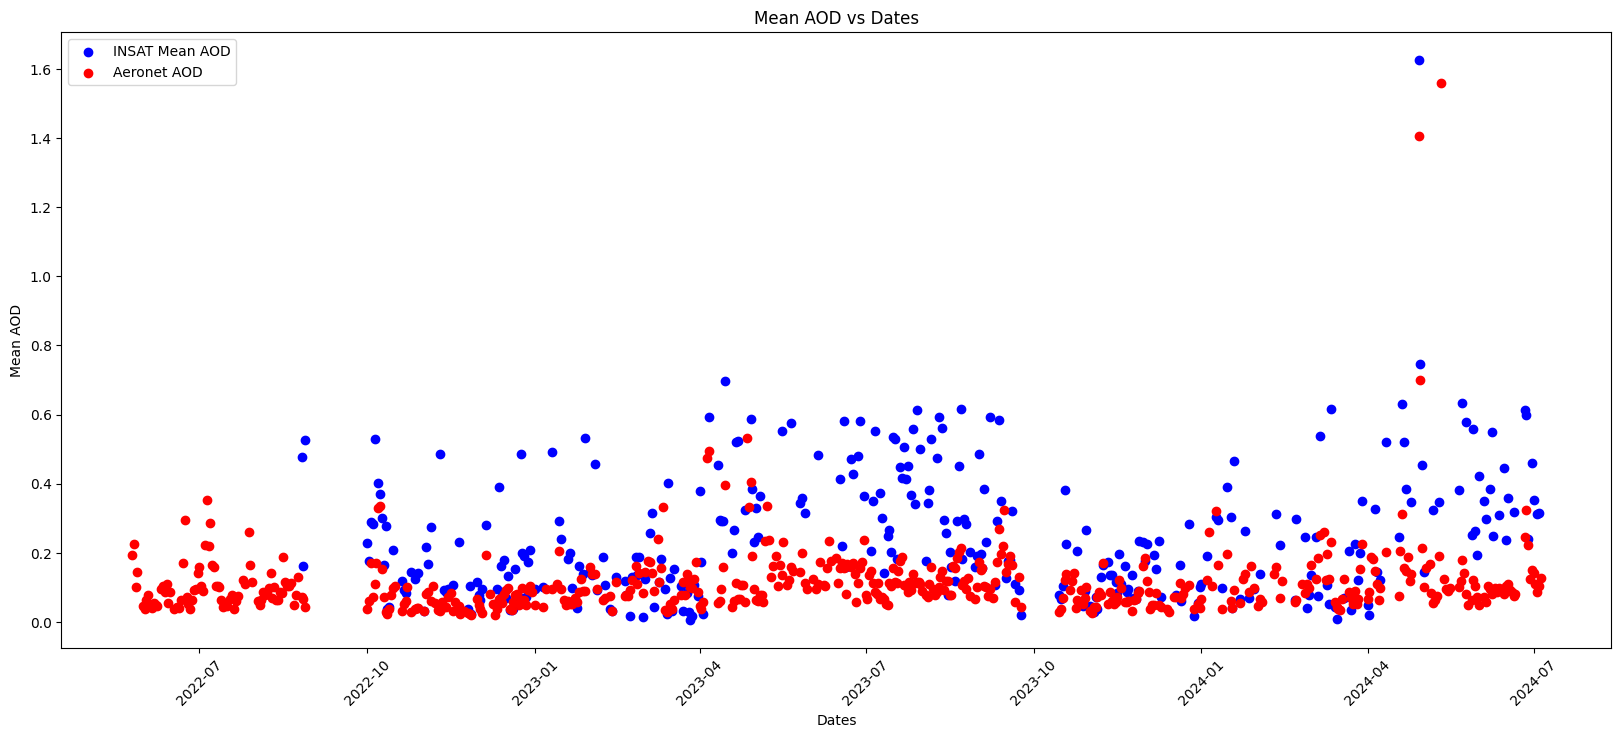

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


plt.figure(figsize=(20, 8))
plt.scatter(merged_df['Date'], merged_df['Mean_AOD'], color='blue', marker='o', label='INSAT Mean AOD')
plt.scatter(merged_df['Date'], merged_df['AOD_675nm'], color='red', marker='o', label='Aeronet AOD')
#plt.plot(merged_df['Date'],merged_df['standard dev'])
# Add title and labels
plt.title('Mean AOD vs Dates')
plt.ylabel('Mean AOD')
plt.xlabel('Dates')
plt.legend()
plt.xticks(rotation=45)

#plt.savefig("/home/jupyter-sanjid/graphs2022-2024/pokhara1.png", format='png', dpi=300)
plt.show()

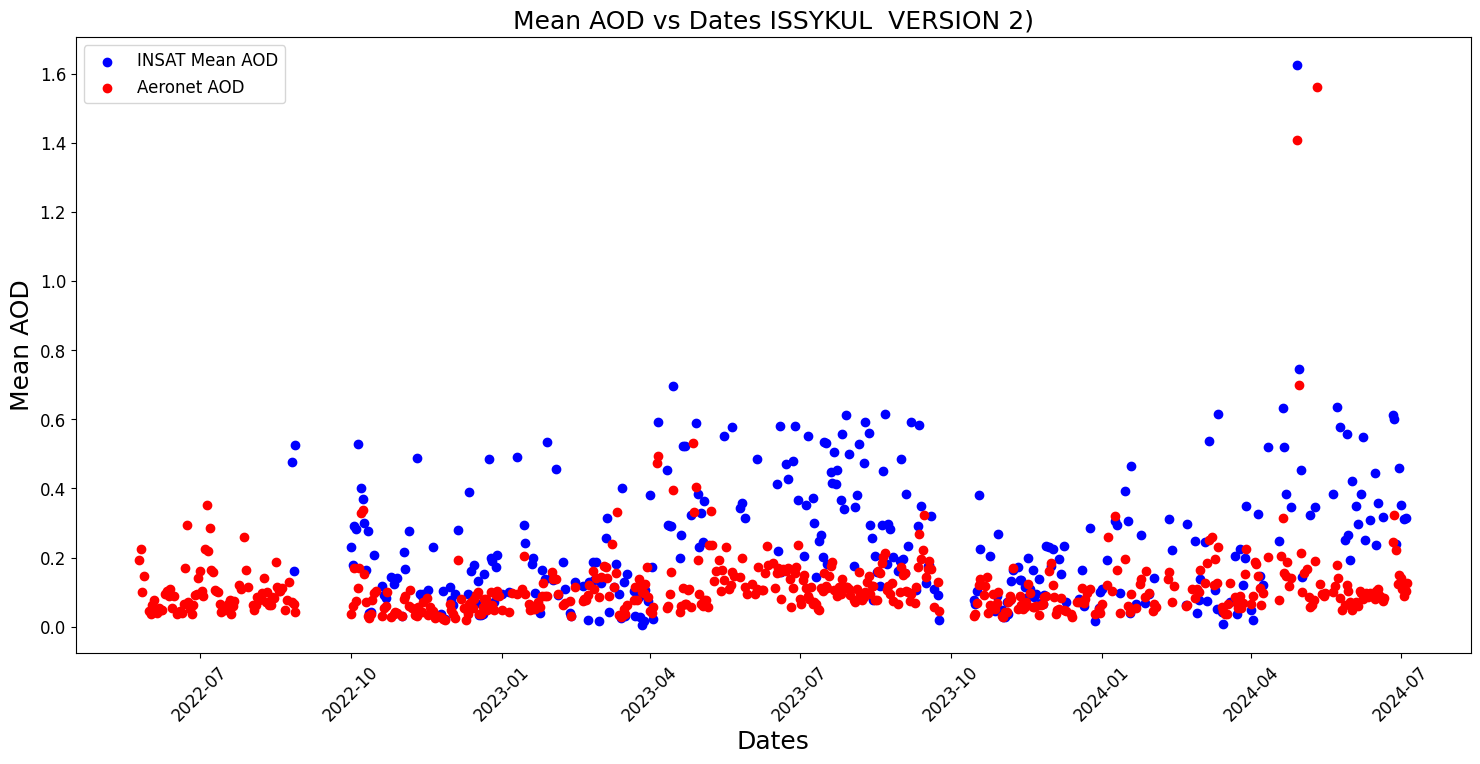

In [6]:
import matplotlib.pyplot as plt

# Filter the data for dates up to 2019
#merged_df_filtered = merged_df[merged_df['Date'].dt.year <= 2019]

# Set publication-quality font sizes
plt.rcParams.update({
    'axes.labelsize': 14,       # Axis labels
    'axes.titlesize': 16,       # Title size
    'xtick.labelsize': 12,      # X-tick labels
    'ytick.labelsize': 12,      # Y-tick labels
    'legend.fontsize': 12,      # Legend size
    'figure.titlesize': 18,     # Figure title size
    'font.family':'Sans Serif'     # Font style (use 'Times New Roman' or 'Helvetica' as  )
})

# Plotting
plt.figure(figsize=(18, 8))
plt.scatter(merged_df['Date'], merged_df['Mean_AOD'], color='blue', marker='o', label='INSAT Mean AOD')
plt.scatter(merged_df['Date'], merged_df['AOD_675nm'], color='red', marker='o', label='Aeronet AOD')

# Add title and labels
plt.title('Mean AOD vs Dates ISSYKUL  VERSION 2)', size=18)
plt.ylabel('Mean AOD', size=18)
plt.xlabel('Dates', size=18)
plt.legend()

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Save the plot as a high-resolution PNG file
plt.savefig("insat v2 filtered/ISSYKUL 2.png", format='png', dpi=300)

# Display the plot
plt.show()


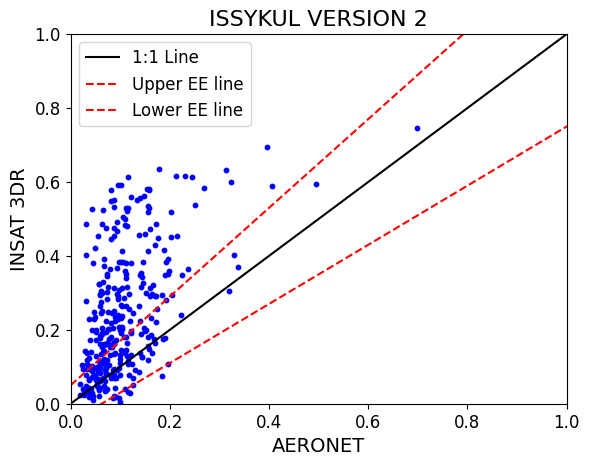

In [8]:
import matplotlib.pyplot as plt
import numpy as np
#upper_bound = (merged_df["AOD_675nm"] * 0.20) + 0.50
#lower_bound = -(upper_bound)

#  1:1 line(if insat and aeronet have same values)
x = np.linspace(0, 3, 100) 
y = x

plt.plot(x, y, label='1:1 Line', color='black', linestyle='-')
#expected error
ee_envelope = 0.20*x + 0.05
plt.plot(x,x+ ee_envelope, 'r--', label='Upper EE line')
plt.plot(x,x - ee_envelope, 'r--', label='Lower EE line')

# Plot the data points
plt.scatter(merged_df['AOD_675nm'], merged_df['Mean_AOD'], color='blue', marker='o', s=10)

plt.title("ISSYKUL VERSION 2")
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("AERONET")
plt.ylabel("INSAT 3DR")
plt.legend()
plt.savefig("insat v2 filtered/SCATTERPLOTS V2/ISSYKUKL .png", format='png', dpi=300) 
plt.show()


In [5]:
print("Unique dates in AERONET data:")
#print(df_selected['Date'].unique())

print("Unique dates in INSAT data:")
print(aod_df['Date'].unique())


Unique dates in AERONET data:
Unique dates in INSAT data:
<DatetimeArray>
['2023-09-23 00:00:00', '2023-12-24 00:00:00', '2022-09-08 00:00:00',
 '2024-03-27 00:00:00', '2022-12-17 00:00:00', '2023-07-21 00:00:00',
 '2024-01-25 00:00:00', '2023-03-06 00:00:00', '2024-08-28 00:00:00',
 '2023-08-14 00:00:00',
 ...
 '2024-09-28 00:00:00', '2023-03-16 00:00:00', '2024-05-29 00:00:00',
 '2023-02-09 00:00:00', '2022-08-24 00:00:00', '2023-06-04 00:00:00',
 '2023-01-20 00:00:00', '2023-08-17 00:00:00', '2024-04-01 00:00:00',
 '2024-02-22 00:00:00']
Length: 755, dtype: datetime64[ns]


In [5]:
insat_only = merged_df[merged_df['AOD_675nm'].isna()]
print("INSAT-only dates and values:")
print(insat_only[['Date', 'Mean_AOD']])


INSAT-only dates and values:
          Date  Mean_AOD
151 2022-08-24       NaN
153 2022-08-26       NaN
154 2022-08-27       NaN
155 2022-08-28       NaN
156 2022-08-29  1.824897
..         ...       ...
909 2024-10-11  0.618495
910 2024-10-12  0.596754
911 2024-10-13  1.103249
912 2024-10-14  1.121497
913 2024-10-15  0.848657

[432 rows x 2 columns]


In [6]:
print(merged_df)


          Date  Mean_AOD  AOD_675nm
0   2022-01-01       NaN   0.345051
1   2022-01-02       NaN   0.601117
2   2022-01-03       NaN   0.417768
3   2022-01-04       NaN   0.465612
4   2022-01-05       NaN   0.365489
..         ...       ...        ...
909 2024-10-11  0.618495        NaN
910 2024-10-12  0.596754        NaN
911 2024-10-13  1.103249        NaN
912 2024-10-14  1.121497        NaN
913 2024-10-15  0.848657        NaN

[914 rows x 3 columns]
